In [57]:
import pandas as pd
import xarray as xr
import copernicusmarine
from seapopym.standard.coordinates import new_longitude, new_latitude, new_time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
xr.set_options(display_expand_data=False, keep_attrs=True)

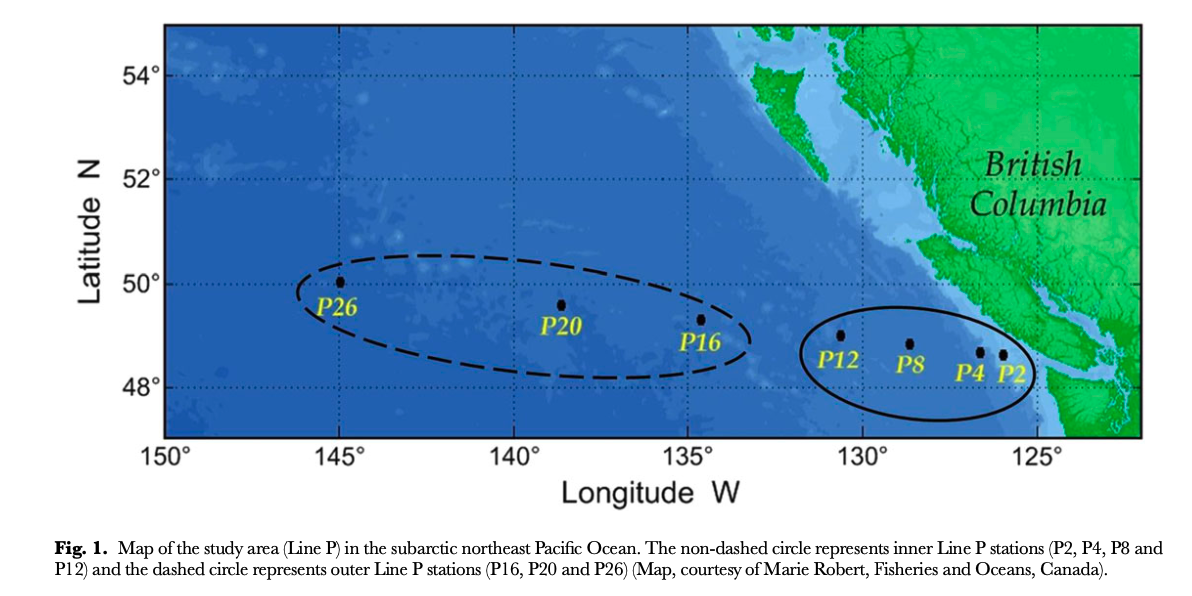


In [9]:
path_to_zoo_day = "../data/phd/PAPA/RAW/P26_mg_per_m3_day.csv"
path_to_zoo_night = "../data/phd/PAPA/RAW/P26_mg_per_m3_night.csv"
papa_station_latitude = 50
papa_station_longitude = -145

In [48]:
raw_papa_day = pd.read_csv(path_to_zoo_day)
raw_papa_day["time"] = pd.to_datetime(raw_papa_day["time"], format="mixed", dayfirst=False)
raw_papa_day = raw_papa_day.set_index("time")
raw_papa_day = raw_papa_day.drop(columns=["TOTAL non GEL"])
raw_papa_day.head()

,CRUST,LARV,THAL,CHAETO,PTEROPOD,small GEL,FORAM,OTH
time,,,,,,,,
1997-06-16,18.28,0.01,0.70,8.15,0.98,0.65,0.02,NaN
1997-09-04,6.80,0.09,0.71,1.51,0.24,3.02,0.16,NaN
1997-09-05,4.09,0.00,1.98,0.03,0.12,0.23,0.00,NaN
1998-02-27,3.32,0.13,0.00,0.93,1.69,2.64,0.02,NaN
1998-02-28,2.55,0.10,0.00,0.36,1.34,1.21,0.01,NaN


In [49]:
raw_papa_night = pd.read_csv(path_to_zoo_night)
raw_papa_night["time"] = pd.to_datetime(raw_papa_night["time"], format="mixed", dayfirst=False)
raw_papa_night = raw_papa_night.set_index("time")
raw_papa_night = raw_papa_night.drop(columns=["TOTAL non GEL"])
raw_papa_night.head()

,CRUST,LARV,THAL,CHAETO,PTEROPOD,small GEL,FORAM,OTH
time,,,,,,,,
1997-02-21,5.35,0.23,0.00,0.30,0.07,0.93,0.01,0.23
1997-06-15,8.60,0.11,0.85,9.72,0.59,0.61,0.04,0.01
1998-02-27,15.91,0.14,0.00,1.49,1.21,2.36,0.14,0.00
1998-06-13,28.28,0.72,0.00,8.00,4.05,7.79,0.14,1.04
1999-02-18,12.98,0.50,0.00,0.78,0.63,12.26,0.02,0.22


In [50]:
papa_day = xr.Dataset.from_dataframe(raw_papa_day).expand_dims(day_phase=["day"])
papa_night = xr.Dataset.from_dataframe(raw_papa_night).expand_dims(day_phase=["night"])
papa_data = xr.concat([papa_day, papa_night], dim="day_phase")
papa_data

<xarray.Dataset> Size: 9kB
Dimensions:    (time: 69, day_phase: 2)
Coordinates:
  * time       (time) datetime64[ns] 552B 1997-02-21 1997-06-15 ... 2020-08-20
  * day_phase  (day_phase) object 16B 'day' 'night'
Data variables:
    CRUST      (day_phase, time) float64 1kB nan nan 18.28 6.8 ... nan nan 26.66
    LARV       (day_phase, time) float64 1kB nan nan 0.01 0.09 ... nan nan 0.16
    THAL       (day_phase, time) float64 1kB nan nan 0.7 0.71 ... nan nan 9.0
    CHAETO     (day_phase, time) float64 1kB nan nan 8.15 1.51 ... nan nan 5.03
    PTEROPOD   (day_phase, time) float64 1kB nan nan 0.98 0.24 ... nan nan 0.45
    small GEL  (day_phase, time) float64 1kB nan nan 0.65 3.02 ... nan nan 3.91
    FORAM      (day_phase, time) float64 1kB nan nan 0.02 0.16 ... nan nan 0.41
    OTH        (day_phase, time) float64 1kB nan nan nan nan ... nan nan 0.54

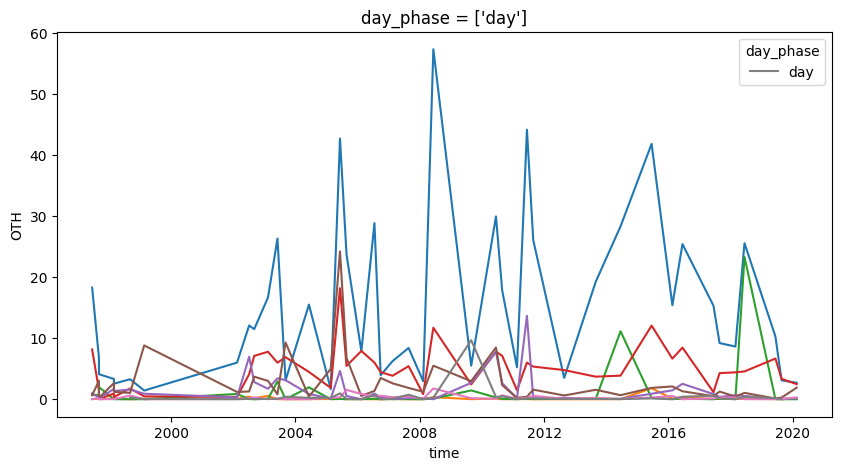

In [52]:
plt.figure(figsize=(10, 5))
for i in papa_night:
    papa_day[i].plot.line(x="time")

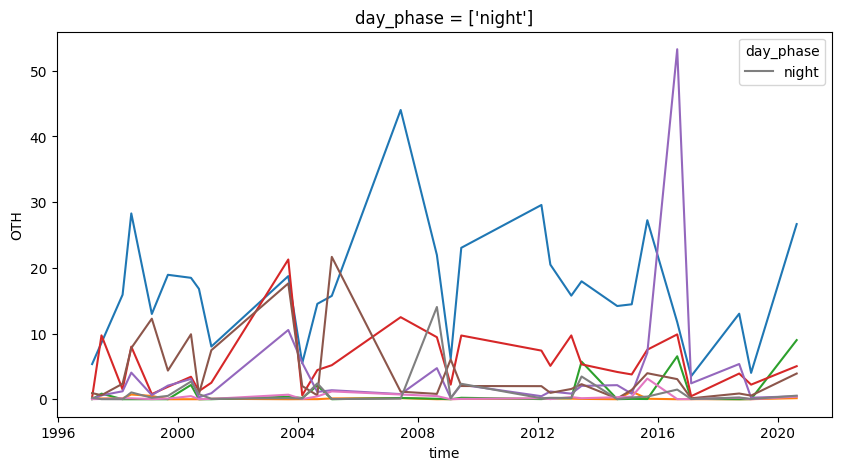

In [53]:
plt.figure(figsize=(10, 5))
for i in papa_night:
    papa_night[i].plot.line(x="time")

# Migrant Zooplankton


In [67]:
all_migrants = [(papa_data[i].sel(day_phase="night") - papa_data[i].sel(day_phase="day")).fillna(0) for i in papa_data]
# TODO(Jules): Sum all values

[<xarray.DataArray 'CRUST' ()> Size: 8B
 38.21
 Coordinates:
     time     datetime64[ns] 8B 2020-08-20,
 <xarray.DataArray 'LARV' ()> Size: 8B
 0.51
 Coordinates:
     time     datetime64[ns] 8B 2020-08-20,
 <xarray.DataArray 'THAL' ()> Size: 8B
 0.0
 Coordinates:
     time     datetime64[ns] 8B 2020-08-20,
 <xarray.DataArray 'CHAETO' ()> Size: 8B
 4.19
 Coordinates:
     time     datetime64[ns] 8B 2020-08-20,
 <xarray.DataArray 'PTEROPOD' ()> Size: 8B
 0.51
 Coordinates:
     time     datetime64[ns] 8B 2020-08-20,
 <xarray.DataArray 'small GEL' ()> Size: 8B
 19.88
 Coordinates:
     time     datetime64[ns] 8B 2020-08-20,
 <xarray.DataArray 'FORAM' ()> Size: 8B
 1.13
 Coordinates:
     time     datetime64[ns] 8B 2020-08-20,
 <xarray.DataArray 'OTH' ()> Size: 8B
 -0.01
 Coordinates:
     time     datetime64[ns] 8B 2020-08-20]

---

# Add the layers limits


---

# Gathering data


# Save the processed data
